## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Parameters of the neural network

In [2]:
N = 20
neurons_at_layer = (100*np.ones(N)).astype(int)  #N layers, with 100 neurons each

N_in = 2
N_out = 1

w = []
b = []

w.append(np.random.uniform(low=-1,high=1,size=[neurons_at_layer[0],N_in]))
b.append(np.random.uniform(low=-1,high=1,size=[neurons_at_layer[0],1]))

for n in range(1,N):
    w.append(np.random.uniform(low=-3,high=3,size=[neurons_at_layer[n],neurons_at_layer[n-1]]))
    b.append(np.random.uniform(low=-3,high=3,size=[neurons_at_layer[n],1]))

w.append(np.random.uniform(low=-1,high=1,size=[N_out, neurons_at_layer[N-1]]))
b.append(np.random.uniform(low=-1,high=1,size=N_out))

## Define the neural network

In [3]:
def f(x):
    return 1/(1+np.exp(-x))

In [4]:
def apply_network(x_n):
    for n in range(N+1):
        x_n = f(np.dot(w[n],x_n) + b[n])
    return x_n

## Sample the output of the network

In [5]:
N_samples = 500

samplex, sampley = np.meshgrid( 
    np.linspace(-0.5,0.5,N_samples), np.linspace(-0.5,0.5,N_samples)
)

sample_in = np.array([samplex.flatten(), sampley.flatten()])
sample_out = apply_network(sample_in).reshape([N_samples,N_samples])

## Plot the results

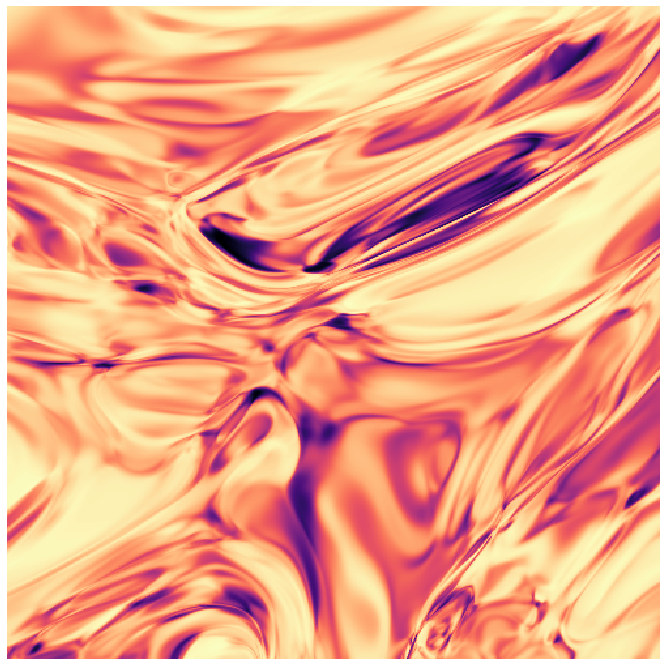

In [20]:
plt.figure(figsize=[12,12])
plt.imshow(sample_out, extent=[-0.5,0.5,-0.5,0.5],interpolation='nearest',cmap =plt.cm.get_cmap('magma'))
# You can choose other color maps : https://matplotlib.org/tutorials/colors/colormaps.html
plt.axis('off')
plt.show()


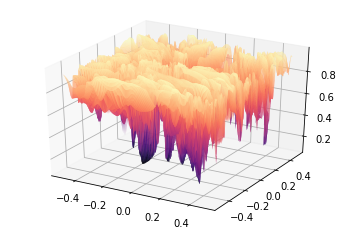

In [21]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
ax.plot_surface(samplex,sampley,sample_out,rstride=2,cstride=2,cmap =plt.cm.get_cmap('magma'))
plt.show()